In [1]:
using Plots
default(size=(500,300), leg=true)
y = rand(100)
scatter(y, z=abs(y-.5), m=10, c=:heat, lab="grad")
plot!(0:10:100,rand(11,4),lab="lines", palette=:grays)

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Initializing backend: immerse

LoadError: LoadError: Unknown key: color_palette
while loading In[1], in expression starting on line 5

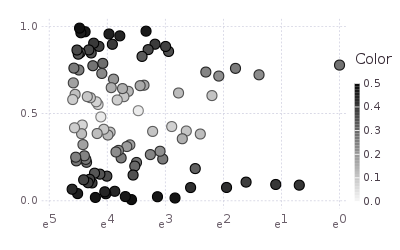

In [3]:
xaxis!(:log, :flip, (e,e^4))

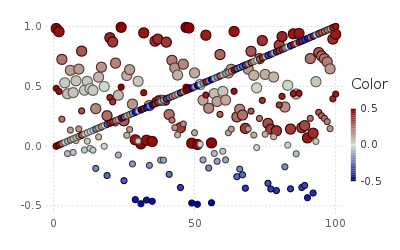

In [4]:
scatter!(linspace(0,1,100), z=Any[y-0.5], c=:bluesreds, xflip=false)

In [40]:
using Plots
#grad = Plots.ColorGradient([colorant"blue", RGB(0.7,0.85,0.7), colorant"darkred"], [0,0.5,1])
#grad = Plots.ColorGradient(:bluesreds)
#grad = Plots.ColorGradient([RGB(.95,.95,.95),RGB(.05,.05,.05)])

function darken(c, v=0.2)
    rgb = RGB(c)
    r = max(0, rgb.r - v)
    g = max(0, rgb.g - v)
    b = max(0, rgb.b - v)
    RGB(r,g,b)
end
function lighten(c, v=0.2)
    darken(c, -v)
end

func = darken
grad = Plots.ColorGradient(map(func, [
    colorant"blue",
    colorant"green",
    #colorant"yellow",
    colorant"orange",
    colorant"red",
    colorant"purple",
    ]))

#grad = Plots.ColorGradient([
#    colorant"lightyellow",
#    colorant"orange",
#    colorant"darkred",
#    #colorant"black"
#    ])
#grad = Plots.ColorGradient(:heat)

function getrange(n::Int)
    zs = zeros(n)
    offset = 0.0
    baseoffset = 0.1
    z = offset
    chg = 0.5
    for i in 1:n
        zs[i] = z
        
        z += chg
        if z > 1.0
            offset += 0.1
            if offset > 0.5
                baseoffset *= 0.5
                offset = baseoffset
            end
            z = offset
#             chg *= 0.5
            #z += chg
        end
    end
    zs
end

function getrange2(n::Int)
    n > 0 || error()
    n == 1 && return zeros(1)
    zs = [0.0, 1.0]
    for i in 3:n
        sorted = sort(zs)
        diffs = diff(sorted)
        widestj = 0
        widest = 0.0
        for (j,d) in enumerate(diffs)
            if d > widest
                widest = d
                widestj = j
            end
        end
        push!(zs, sorted[widestj] + 0.5 * diffs[widestj])
    end
    zs
end

#colors = RGB[Plots.getColorZ(grad,z) for z in 0:0.01:1]
#zs = map(z->z%1.0, 0:.285:3)
zs = getrange2(20)
map(println, zs)
colors = RGB[Plots.getColorZ(grad, z) for z in zs]

0.0


1.0
0.5
0.25
0.75
0.125
0.375
0.625
0.875
0.0625
0.1875
0.3125
0.4375
0.5625
0.6875
0.8125
0.9375
0.03125
0.09375
0.15625


In [8]:
using Plots
zs = 0:0.05:1
for gradientsym in sort(collect(keys(Plots._gradients)))
    display(gradientsym)
    gradient = ColorGradient(gradientsym)
    display(RGB[getColorZ(gradient,z) for z in zs])
end

:blues

:bluesreds

:darkrainbow

:grays

:greens

:heat

:lightrainbow

:rainbow

:reds

:redsblues